## Análise de séries temporais - Banco Inter
    Dados retirados do site: https://finance.yahoo.com/quote/INBR32.SA/history?p=INBR32.SA - De 2022-08-26 até 2023-12-01

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import random as random
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Dados Inter
INBR32 = pd.read_csv('INBR32.SA.csv')

#No caso, iremos utilizar somente os valores de fechamento - "Close"
INBR32.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-26,22.15,22.219999,21.00,21.15,21.15,2685566
1,2022-08-29,21.15,21.150000,21.15,21.15,21.15,0
2,2022-08-30,21.15,21.150000,21.15,21.15,21.15,0
3,2022-08-31,21.15,21.150000,21.15,21.15,21.15,0
4,2022-09-01,21.15,21.150000,21.15,21.15,21.15,0


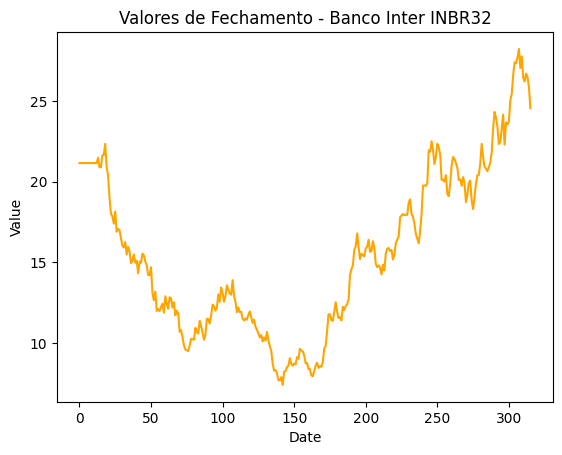

In [3]:
# Plot
plt.plot(INBR32['Close'],'orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Valores de Fechamento - Banco Inter INBR32')
plt.show()

In [4]:
#Visualização de features
INBR32.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
#Retirada das features não utilizadas
data = INBR32.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=0, inplace=False)
#São 315 dias de registro.
data.shape

(316, 2)

## TREINO E TESTE

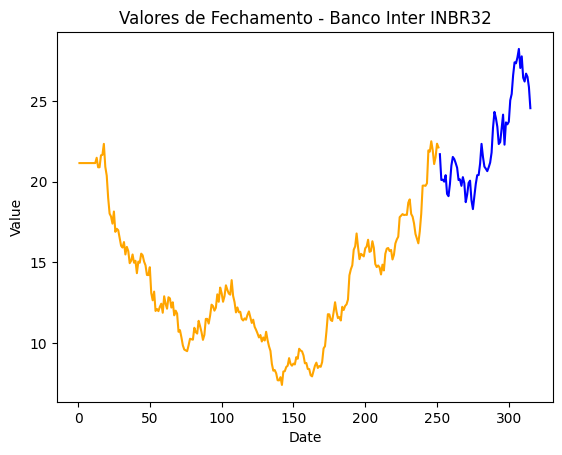

In [6]:
#Divisão entre treino e teste. 
train = data[1:252] #80% - 252 dias 
test = data[252:316] #20% - 64 dias

# Plot
plt.plot(train['Close'],'orange',test['Close'],'b')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Valores de Fechamento - Banco Inter INBR32')
plt.show()

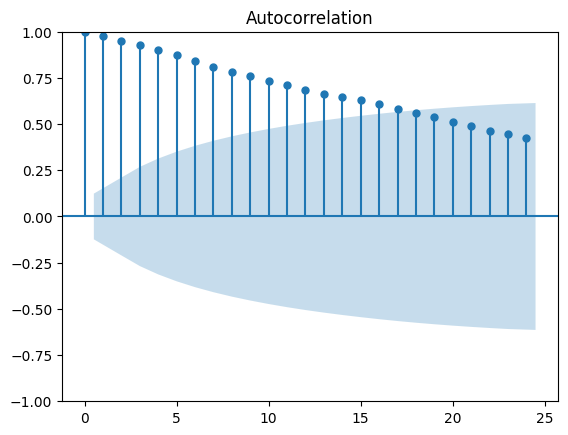

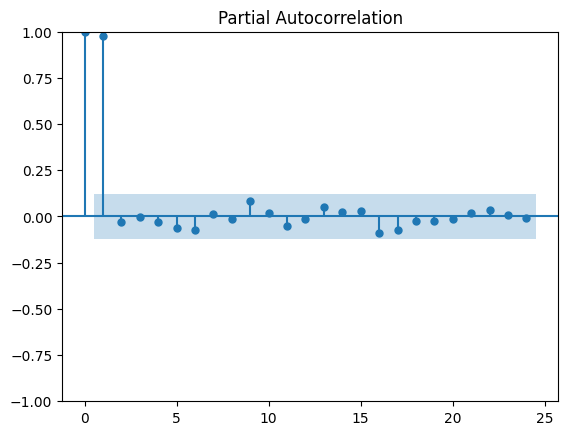

In [7]:
#FAC e FACP
plot_acf(train['Close'])
plot_pacf(train['Close'])
plt.show()

#Percebe-se pelo FACP que o lag = 1.

## ARIMA TREINO

In [8]:
# ARIMA example
# fit model
model = ARIMA(np.asarray(train['Close']), order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1, len(train['Date'])-1, typ='levels')
print(yhat)

[21.15000024 21.15000022 21.15000021 21.1500002  21.15000019 21.15000018
 21.15000017 21.15000016 21.15000015 21.15000015 21.15000014 21.15000013
 21.48970625 20.88219648 20.8825486  21.64365991 21.6738863  22.37188814
 20.9120636  20.34767924 18.93203902 17.93902865 17.75779468 17.30990602
 18.08298797 16.79365328 16.99252265 16.90391509 16.40520953 15.92741492
 15.81893706 16.17154572 15.38619683 15.8720382  15.60928419 14.84467642
 15.00265478 15.40612796 14.88718375 15.01388196 14.22878768 14.97028352
 14.90184444 15.4784916  15.37859109 14.98173264 14.74899475 14.13751877
 14.13062428 14.63554317 12.99997619 12.54329687 13.10048063 11.87553137
 12.00301572 11.87424917 12.15494031 12.35329466 11.78349904 12.83160686
 12.35321626 12.04919988 12.77929577 12.71008586 12.12899519 12.46967767
 11.64292455 11.94290035 11.76134413 10.60736229 10.71346372 10.26653946
  9.75847578  9.49641639  9.44940812  9.40227915  9.77473112 10.19786276
 10.1700599  10.14216843 10.90239686 10.62793151 10

c:\Users\Ranier\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Ranier\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


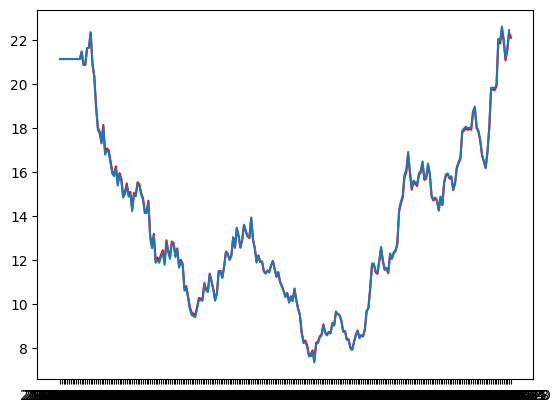

In [9]:
#AIC https://en.wikipedia.org/wiki/Akaike_information_criterion
#BIC https://en.wikipedia.org/wiki/Bayesian_information_criterion
#Quanto menor melhor
#Plot
plt.figure()
plt.plot(train['Date'],train['Close'], 'r', yhat )

In [10]:
#Métricas
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -194.081
Date:                Mon, 04 Dec 2023   AIC                            394.162
Time:                        19:42:51   BIC                            404.726
Sample:                             0   HQIC                           398.414
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9834      0.033     29.548      0.000       0.918       1.049
ma.L1         -0.9597      0.049    -19.780      0.000      -1.055      -0.865
sigma2         0.2764      0.021     13.091      0.000       0.235       0.318
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                10.47
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               1.24   Skew:                             0.22
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA TESTE

In [11]:
# ARIMA example
# fit model
model = ARIMA(np.asarray(train['Close']), order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1, len(test['Date']), typ='levels')
print(yhat)

[21.15000024 21.15000022 21.15000021 21.1500002  21.15000019 21.15000018
 21.15000017 21.15000016 21.15000015 21.15000015 21.15000014 21.15000013
 21.48970625 20.88219648 20.8825486  21.64365991 21.6738863  22.37188814
 20.9120636  20.34767924 18.93203902 17.93902865 17.75779468 17.30990602
 18.08298797 16.79365328 16.99252265 16.90391509 16.40520953 15.92741492
 15.81893706 16.17154572 15.38619683 15.8720382  15.60928419 14.84467642
 15.00265478 15.40612796 14.88718375 15.01388196 14.22878768 14.97028352
 14.90184444 15.4784916  15.37859109 14.98173264 14.74899475 14.13751877
 14.13062428 14.63554317 12.99997619 12.54329687 13.10048063 11.87553137
 12.00301572 11.87424917 12.15494031 12.35329466 11.78349904 12.83160686
 12.35321626 12.04919988 12.77929577 12.71008586]


c:\Users\Ranier\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Ranier\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


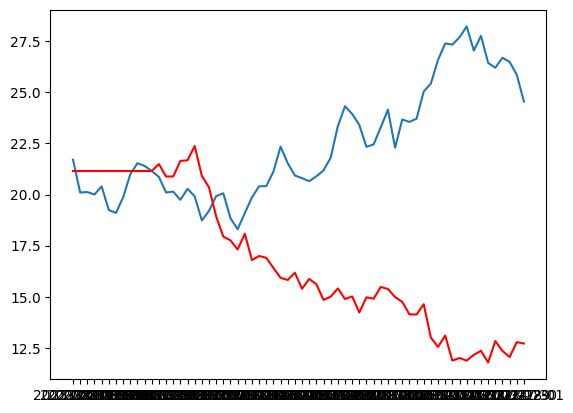

In [12]:
#Plot
plt.figure()
#plt.plot(train['Date'],test['Close'], 'r', yhat )
plt.plot(test['Date'], test['Close'] , yhat, 'r')

## HOLT - WINTERS TREINO

In [13]:
#HWES
# fit model
model = ExponentialSmoothing(np.asarray(train['Close']))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(0, len(train['Date'])-1)
print(yhat)

[21.15       21.15       21.15       21.15       21.15       21.15
 21.15       21.15       21.15       21.15       21.15       21.15
 21.15       21.48       20.88999901 20.889999   21.62999899 21.66
 22.33999999 20.92000002 20.37000101 18.99000002 18.02000001 17.84
 17.40000001 18.14999999 16.88999902 17.08       16.99       16.50000001
 16.03000101 15.92       16.25999999 15.49000001 15.95999999 15.7
 14.95000001 15.1        15.48999999 14.98000001 15.1        14.33000001
 15.04999999 14.98       15.53999999 15.44       15.05000001 14.82
 14.22000001 14.21       14.69999999 13.10000002 12.65000001 13.18999999
 11.99000002 12.11       11.98       12.25       12.44       11.88000001
 12.89999998 12.43000001 12.13       12.83999999 12.77       12.20000001
 12.53       11.72000001 12.01       11.83       10.70000002 10.8
 10.36000001  9.86000001  9.6         9.55        9.5         9.85999999
 10.26999999 10.24       10.21       10.94999999 10.68       10.59
 11.37999999 11.05       10.

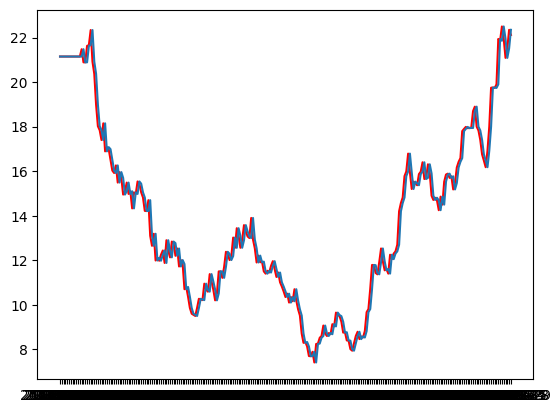

In [14]:
#Plot
plt.figure()
plt.plot(train['Date'],train['Close'], 'r', yhat )

In [15]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,251
Model:,ExponentialSmoothing,SSE,70.104
Optimized:,True,AIC,-316.144
Trend:,None,BIC,-309.093
Seasonal:,None,AICC,-315.981
Seasonal Periods:,None,Date:,"Mon, 04 Dec 2023"
Box-Cox:,False,Time:,19:42:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,21.150000,l.0,True


## HOLT WINTERS TESTE

In [18]:
#HWES
# fit model
model = ExponentialSmoothing(np.asarray(train['Close']))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1, len(test['Date']))
print(yhat)

[21.15       21.15       21.15       21.15       21.15       21.15
 21.15       21.15       21.15       21.15       21.15       21.15
 21.48       20.88999901 20.889999   21.62999899 21.66       22.33999999
 20.92000002 20.37000101 18.99000002 18.02000001 17.84       17.40000001
 18.14999999 16.88999902 17.08       16.99       16.50000001 16.03000101
 15.92       16.25999999 15.49000001 15.95999999 15.7        14.95000001
 15.1        15.48999999 14.98000001 15.1        14.33000001 15.04999999
 14.98       15.53999999 15.44       15.05000001 14.82       14.22000001
 14.21       14.69999999 13.10000002 12.65000001 13.18999999 11.99000002
 12.11       11.98       12.25       12.44       11.88000001 12.89999998
 12.43000001 12.13       12.83999999]


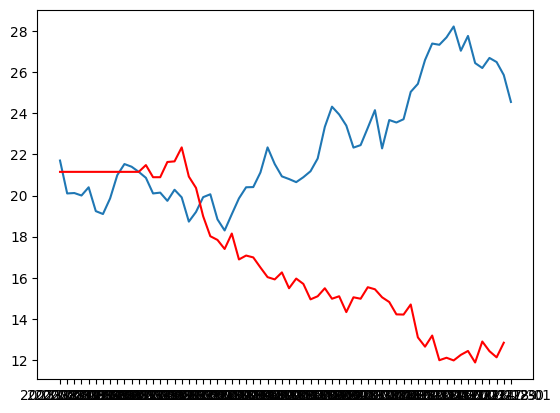

In [19]:
#Plot
plt.figure()
#plt.plot(train['Date'],test['Close'], 'r', yhat )
plt.plot(test['Date'], test['Close'] , yhat, 'r')